In [2]:
import pandas as pd

from sklearn.cross_validation import cross_val_score, train_test_split
from sklearn import cross_validation, metrics
from sklearn.metrics import log_loss


import xgboost as xgb
from xgboost import DMatrix

import matplotlib.pyplot as plt
%matplotlib inline

/home/kirill/anaconda2/lib/python2.7/site-packages/sklearn/cross_validation.py:44: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [3]:
fich = pd.read_csv("fich_mail.csv",",")
res = pd.read_csv("res_mail.csv",",",header=None)
test = pd.read_csv("test_mail.csv",",")

Feature ranking:
1. feature 3 (0.143574)
2. feature 4 (0.120588)
3. feature 11 (0.113509)
4. feature 8 (0.103413)
5. feature 0 (0.097312)
6. feature 9 (0.069494)
7. feature 6 (0.060568)
8. feature 10 (0.058944)
9. feature 20 (0.047170)
10. feature 2 (0.042855)
11. feature 7 (0.042474)
12. feature 1 (0.037997)
13. feature 15 (0.022277)
14. feature 12 (0.017099)
15. feature 5 (0.008648)
16. feature 13 (0.005073)
17. feature 16 (0.004328)
18. feature 19 (0.002704)
19. feature 14 (0.001143)
20. feature 18 (0.000794)
21. feature 17 (0.000036)


-c:6: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().


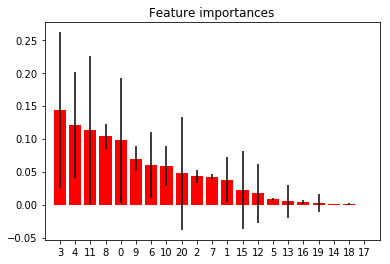

In [4]:
from sklearn import ensemble
import numpy as np
forest = ensemble.RandomForestClassifier(n_estimators=285,
                              random_state=1234)

forest.fit(fich, res)
importances = forest.feature_importances_
std = np.std([tree.feature_importances_ for tree in forest.estimators_],
             axis=0)
indices = np.argsort(importances)[::-1]

# Print the feature ranking
print("Feature ranking:")

for f in range(fich.shape[1]):
    print("%d. feature %d (%f)" % (f + 1, indices[f], importances[indices[f]]))

# Plot the feature importances of the forest
plt.figure()
plt.title("Feature importances")
plt.bar(range(fich.shape[1]), importances[indices],
       color="r", yerr=std[indices], align="center")
plt.xticks(range(fich.shape[1]), indices)
plt.xlim([-1, fich.shape[1]])
plt.show()


In [4]:
train_data, test_data, train_labels, test_labels = cross_validation.train_test_split(fich,res,
                                                                                     test_size = 0.2,
                                                                                     random_state = 1234)

In [5]:
dtrain = DMatrix(data=train_data, label=train_labels)

In [8]:
param = {
    'colsample_bytree': 1.0,
    'silent': 1,
    'eval_metric': 'mlogloss',
    'nthread': 6,
    'min_child_weight': 6.0,
    'n_estimators': 285.0,
    'subsample': 0.5, 'eta': 0.025,
    'objective': 'multi:softprob',
    'num_class': 2,
    'max_depth': 3,
    'gamma': 0.9
}
numround = 10000
history = xgb.cv(params=param, dtrain=dtrain, num_boost_round=numround,nfold=5, stratified=True, early_stopping_rounds=200, verbose_eval = 200)

[0]	train-mlogloss:0.680824+7.64183e-05	test-mlogloss:0.680888+0.000115954
[200]	train-mlogloss:0.376266+0.00162633	test-mlogloss:0.384062+0.00627676
[400]	train-mlogloss:0.367545+0.00153538	test-mlogloss:0.382816+0.00641992
[600]	train-mlogloss:0.361152+0.00154371	test-mlogloss:0.38307+0.00637427


In [10]:
history.tail()

,test-mlogloss-mean,test-mlogloss-std,train-mlogloss-mean,train-mlogloss-std
476,0.382746,0.006421,0.364927,0.001556
477,0.382741,0.006441,0.364902,0.001558
478,0.382741,0.006444,0.364867,0.001555
479,0.382740,0.006440,0.364827,0.001555
480,0.382726,0.006446,0.364791,0.001559


In [28]:
bst = xgb.train(params=param, dtrain=dtrain, num_boost_round=480)

In [29]:
y_ans = bst.predict(DMatrix(data=test_data))

In [99]:
log_loss(test_labels,df_to_save)

0.3772724759197853

In [32]:
y_ans = pd.DataFrame(bst.predict(DMatrix(data=test_data.to_sparse())))[1]
y_ans.head()

0    0.246675
1    0.025466
2    0.488375
3    0.407175
4    0.132174
Name: 1, dtype: float32

In [34]:
df_to_save = pd.DataFrame(y_ans)

In [46]:
df_to_save.index = test_labels.index

In [51]:
df_to_save[df_to_save.index == 14232]

,1
14232,0.246675


In [98]:
for ind in test_labels[test_data.maxPlayerLevel == 0].index:
    df_to_save[df_to_save.index == ind] = 0.0326

In [ ]:

df_to_save.to_csv('preds_xgb_025.csv', sep = ',', index=False,header=None)

In [27]:
res[fich.maxPlayerLevel == 0]

,0
5,0
24,0
26,0
33,0
39,0
70,0
71,0
83,0
91,0
141,0
